<a href="https://colab.research.google.com/github/btg1631/study_data_analytics/blob/main/docs/pandas/08_pandas_preprocessing_outlier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df_LCOCT = pd.read_csv("LetalCarOfContractType.csv")
df_LCOCT[:2]

,id,type_of_contract,type_of_contract2,channel,datetime,Term,payment_type,product,amount,state,overdue_count,overdue,credit rating,bank,cancellation,age,Mileage
0,66758234,렌탈,Normal,서비스 방문,2019-10-20,60,CMS,K1,96900,계약확정,0,없음,9.0,새마을금고,정상,43.0,1862.0
1,66755948,렌탈,Extension_Rental,서비스 방문,2019-10-20,60,카드이체,K1,102900,계약확정,0,없음,2.0,현대카드,정상,62.0,2532.0


## 전처리

### 결측치 처리

In [ ]:
df_LCOCT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51304 entries, 0 to 51303
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 51304 non-null  int64  
 1   type_of_contract   51300 non-null  object 
 2   type_of_contract2  51303 non-null  object 
 3   channel            51304 non-null  object 
 4   datetime           51304 non-null  object 
 5   Term               51304 non-null  int64  
 6   payment_type       51304 non-null  object 
 7   product            51303 non-null  object 
 8   amount             51304 non-null  int64  
 9   state              51304 non-null  object 
 10  overdue_count      51304 non-null  int64  
 11  overdue            51302 non-null  object 
 12  credit rating      42521 non-null  float64
 13  bank               48544 non-null  object 
 14  cancellation       51279 non-null  object 
 15  age                40509 non-null  float64
 16  Mileage            405

In [ ]:
df_LCOCT.isnull().sum()

id                       0
type_of_contract         4
type_of_contract2        1
channel                  0
datetime                 0
Term                     0
payment_type             0
product                  1
amount                   0
state                    0
overdue_count            0
overdue                  2
credit rating         8783
bank                  2760
cancellation            25
age                  10795
Mileage              10795
dtype: int64

In [ ]:
df_LCOCT.dropna(inplace=True)
df_LCOCT.info()

### 이상치 : 이상한 값
- IQR : 4분위

In [ ]:
import seaborn as sns

<Axes: xlabel='age'>

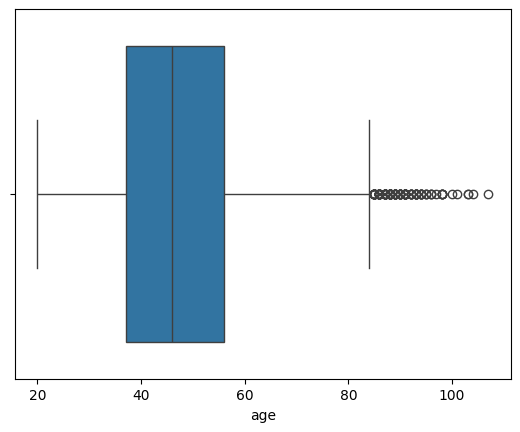

In [ ]:
import matplotlib.pyplot as plt
sns.boxplot(data=df_LCOCT, x='age')

#### 사분위 공식
- Q1 - 1.5 * IQR = Min, Q3 + 1.5 * IQR => Max


In [ ]:
Q1 = df_LCOCT['age'].describe().loc['25%']
Q3 = df_LCOCT['age'].describe().loc['75%']
IQR = Q3 - Q1
Q1, Q3, IQR

(37.0, 56.0, 19.0)

In [ ]:
bound_max = Q3 + 1.5 * IQR
bound_max

84.5

In [ ]:
conditions = f'age <= {bound_max}'
df_LCOCT.query(conditions, inplace=True)

<Axes: xlabel='age'>

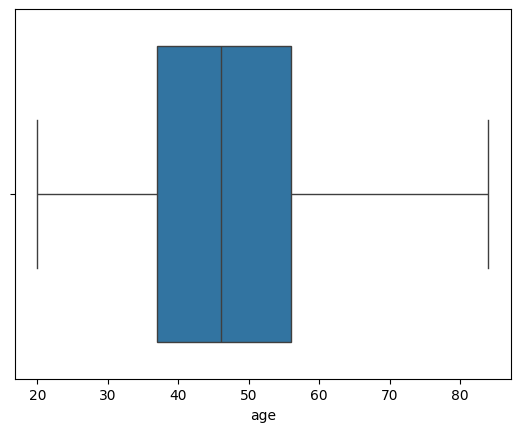

In [ ]:
sns.boxplot(data=df_LCOCT, x='age')

#### with numpy

In [ ]:
import numpy as np
np.percentile(df_LCOCT['age'], 25)

37.0